# Lab Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the Lab assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the Lab assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [2]:
# Question 1 code here
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [3]:
#Use iloc or np.split()
x_data = data.drop(columns=['Class']).values
y_data = data.Class.values

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)



print("Data Size")
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

Data Size
142403 142404
142403 142404


## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

**QESTION 1:** 
 
 Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**ANSWER HERE:** 

`LogisticRegression` uses the `L2` penalty function by default. Other penalties include `L1` and `Elasticnet`.
 
**QUESTION 2:**   

* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**ANSWER HERE:** 
 
 Regularization is used to prevent overfitting of data by penalizing high-valued regressions. This process reduces the coefficients compared to non-regularized data
 
 **QUESTION 3:**   
  
If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** 

By default the `fit_intercept` is set to `TRUE` meaning a column of 1s isn't required. This specifies that a constant should be added to the decision function

## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. 

Then **make a scatter-plot of `Amount` and `Outcome` on your test data** and add the class prediction (0 or 1, using `predict`) and the predicted probability of a positive outcome (using `predict_proba`). Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1).

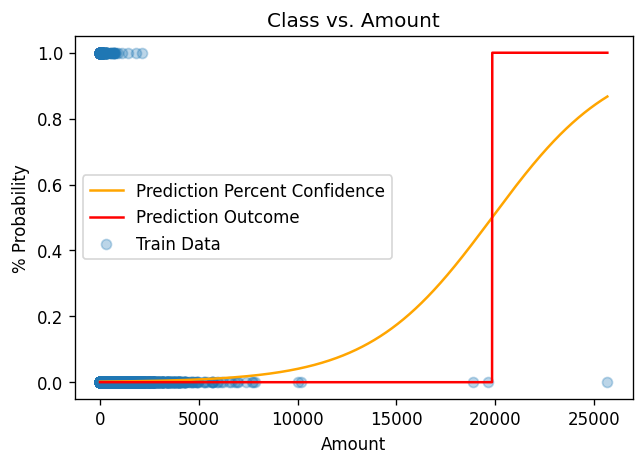

In [4]:
# Question 4 code here

# Data 
amount_train = x_train[:,29].reshape(-1,1)
amount_test = x_test[:,29].reshape(-1,1)
class_test = y_test

# Scatter Plot
fig, ax = plt.subplots(dpi = 120)
fig.set_facecolor('white')
ax.scatter(amount_test, y_test, label="Train Data", alpha=0.3)
# ax.scatter(amount_test, y_test, label="Test Data", color = "green", alpha=0.3)

# Model
lr_amount = LogisticRegression(penalty='none', max_iter=10000)
lr_amount.fit(amount_train, y_train)



# Line Data 
x_line = np.linspace(amount_test.min(), amount_test.max(), 5000).reshape(-1,1)
y_prob_pred_line = lr_amount.predict_proba(x_line)
y_outcome_pred_line = y_prob_pred_line >= 0.5

y_outcome_pred = lr_amount.predict(x_line)

# Plot Model 
sns.lineplot(x=x_line[:,-1], y=y_prob_pred_line[:,-1], ci=None, sort=1, ax=ax, color = "orange", label="Prediction Percent Confidence")
sns.lineplot(x=x_line[:,-1], y=y_outcome_pred_line[:,-1], ci=None, sort=1, ax=ax, color = "red", label="Prediction Outcome")


# Scatter Plot Formatting 
ax.set_title('Class vs. Amount')
ax.set_xlabel('Amount')
ax.set_ylabel('% Probability')
plt.legend()
plt.show()




## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

**QUESTION 1:** 
How many of the test instances are labeled positive by your classifier?

**ANSWER:** 

Only 1 test instance was labeled positive by the classifier. This result is a false positive 

**QUESTION 2:**
 
Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**ANSWER:** 

The model predicted a positive because the model predicts a correlation between the amount and the chance of the transfer being fraudulent. Since the data point is a larger outlier (x >= 25 000) the classifer flags the transaction (Incorrectly)


**QUESTION 3:**

Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.

**ANSWER:** 

Since the recall is 0.0 the classifier is not good at flagging fraudulent transactions. The model predicts a true negative almost everytime and ignores true fraudulent transactions. 
   

**OUTPUT:** 

* tp: 0 
* tn: 142160 
* fp: 1 fn: 243
* Accuracy: 0.998
* Recall: 0.0 
* Precision: 0.0 
* Sensitivity: 0.0 
* Specificity: 1.0


In [5]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:

threshold = 0.5
y_test_pred_prob = lr_amount.predict_proba(amount_test)[:,-1]
y_test_pred_bool = y_test_pred_prob >= threshold
compute_performance(y_test_pred_bool, y_test, (0,1))

## Put code here to compute whatever else you might need to answer the question.



tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 Recall: 0.0 Precision: 0.0 Sensitivity: 0.0 Specificity: 1.0


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

**QUESTION:** 

According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

**ANSWER:** 

Since the coefficient for the amount is negative, the model will predict that a greater amount will be less likely a fraud.


In [6]:
# Code for Question 6

lr_all = LogisticRegression(penalty='none', max_iter = 10000)
lr_all = lr_all.fit(x_train, y_train)
y_all_pred_prob = lr_all.predict_proba(x_test)[:,-1]


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

**QUESTION:** 

How many of the test instances are labeled positive by your classifier?

**ANSWER:** 

182 entries are labeled positive. 

**QUESTION:** 

Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

**ANSWER:** 

This classifier is better in every way. This can be seen when comparing the accuracy, recall precision, sensitivity and specificity 

In [7]:
# Code for Question 7
y_all_pred_bool = y_all_pred_prob >= 0.5
compute_performance(y_all_pred_bool, y_test, (0,1))




tp: 151 tn: 142132 fp: 29 fn: 92
Accuracy: 0.999 Recall: 0.621 Precision: 0.839 Sensitivity: 0.621 Specificity: 1.0


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

**QUESTION:** 

Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**ANSWER:** 

The all values classifier is slightly better at correctly distinguishing between a positive and a negative instance. 
The accuracy from the all values classifier is slightly higher at 0.999 as opposed to 0.998 of the amount-only classifier.

**QUESTION:** 

How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**ANSWER:** 

The results from the logistic regression classifier produces an AUROC since due to logical errors. This causes the result to be flipped which is confirmed by the fact by the precision score of 0.0. Therefore, it is best to use the all classifier with a precision score of 0.839





c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


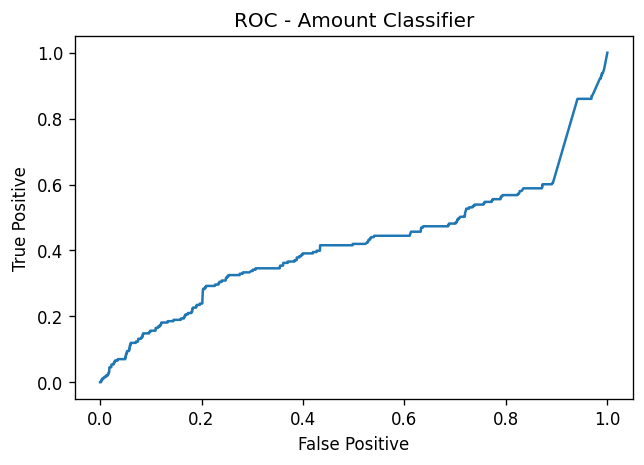

In [8]:
# ROC for Amount-only classifier
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob, pos_label = 1)

# Plot
fig, ax = plt.subplots(dpi = 120)
ax = sns.lineplot(fpr, tpr, ax=ax)

# Formatting
ax.set_title("ROC - Amount Classifier")
fig.set_facecolor('white')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
plt.show()

c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precision')

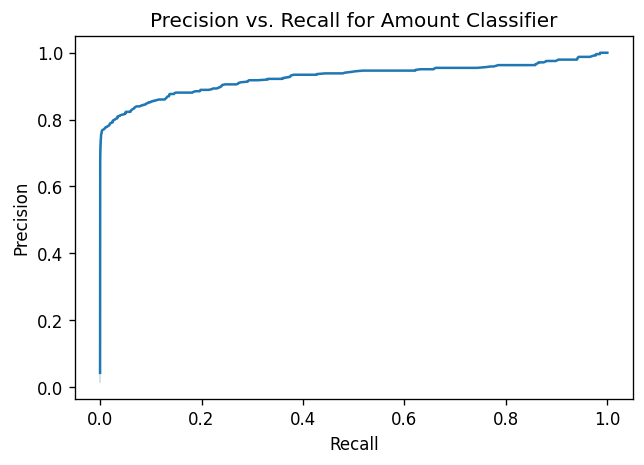

In [9]:
# ROC for all-variable classifier
fpr, tpr, threshold = roc_curve(y_test, y_all_pred_prob, pos_label=1)

# Plot
fig, ax = plt.subplots(dpi = 120)
ax = sns.lineplot(fpr, tpr, ax=ax)

# Formatting 
fig.set_facecolor('white')
ax.set_title('Precision vs. Recall for Amount Classifier')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')


# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

**QUESTION:** 

Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

**ANSWER:** 

Recovering at least 60% of fraudulent transactions would require a precision score of over 0.60. The amount only classifier does not have this level of precision which is why the all values classifier should be used.


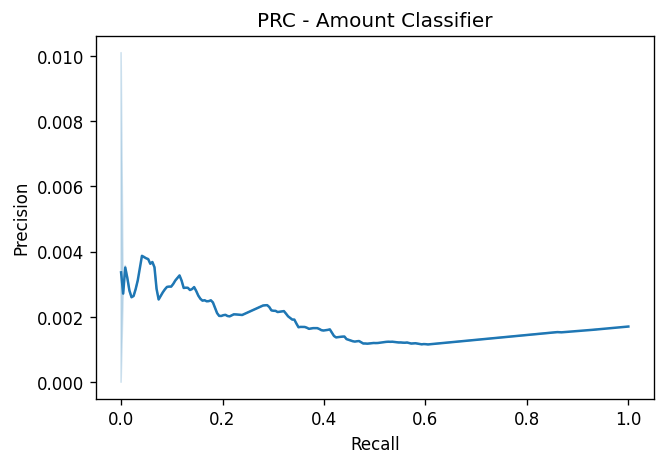

In [10]:
# PRC for Amount-only classifier
precision, recall, threshold = precision_recall_curve(y_test, y_test_pred_prob, pos_label = 1)

# Plot
fig, ax = plt.subplots(dpi = 120)
ax = sns.lineplot(x = recall, y = precision)

# Formatting 
fig.set_facecolor('white')
ax.set_title("PRC - Amount Classifier")
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()


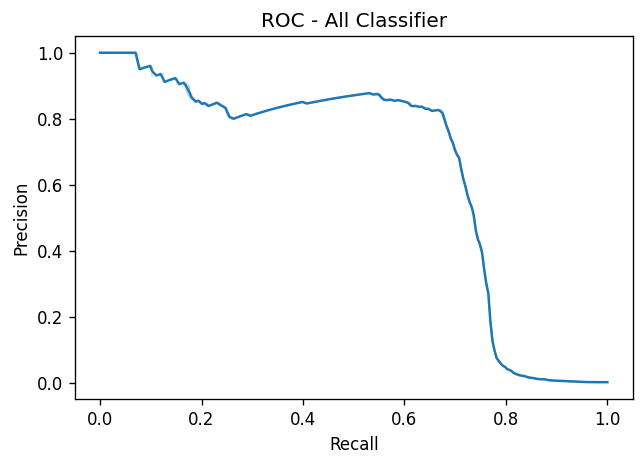

In [11]:
# PRC for all-variable classifier
precision, recall, threshold = precision_recall_curve(y_test, y_all_pred_prob, pos_label = 1)

# Plot
fig, ax = plt.subplots(dpi = 120)
ax = sns.lineplot(x = recall, y = precision)

# Formatting 
ax.set_title("ROC - All Classifier")
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()